In [64]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [65]:
home_dir = '.' # change to yours
alpha = 40
rank = 200
regParam = 1
maxIter = 20
output_dir = f'{home_dir}/time_outputs_scann'
num_users = 5
ks = np.concatenate([[1],np.arange(50,550,50)])

In [72]:
out_file_annoy = [f'{output_dir}/annoy_MFImp_a{alpha}r{rank}_reg{regParam}_it{maxIter}_k{k}.json' for k in ks]
out_file_bruteforce = [f'{output_dir}/bruteforce_MFImp_a{alpha}r{rank}_reg{regParam}_it{maxIter}_k{k}.json' for k in ks]
out_file_scann = [f'{output_dir}/scann_MFImp_a{alpha}r{rank}_reg{regParam}_it{maxIter}_k{k}.json' for k in ks]

In [73]:
annoy_timings = dict()
for file in out_file_annoy:
    with open(file) as f:
        out = json.load(f)
        f.close()
    annoy_timings[int(file.split('.')[-2].split('k')[1])] = out['timings']

bruteforce_timings = dict()
for file in out_file_bruteforce:
    with open(file) as f:
        out = json.load(f)
        f.close()
    bruteforce_timings[int(file.split('.')[-2].split('k')[1])] = out['timings']

scann_timings = dict()
for file in out_file_scann:
    with open(file) as f:
        out = json.load(f)
        f.close()
    scann_timings[int(file.split('.')[-2].split('k')[1])] = out['timings']

In [74]:
annoy_means = {k : np.mean(annoy_timings[k]) for k in list(annoy_timings.keys())}
annoy_stddev = {k : np.std(annoy_timings[k]) for k in list(annoy_timings.keys())}
bruteforce_means = {k : np.mean(bruteforce_timings[k]) for k in list(bruteforce_timings.keys())}
bruteforce_stddev = {k : np.std(bruteforce_timings[k]) for k in list(bruteforce_timings.keys())}
scann_means = {k : np.mean(scann_timings[k]) for k in list(scann_timings.keys())}
scann_stddev = {k : np.std(scann_timings[k]) for k in list(scann_timings.keys())}

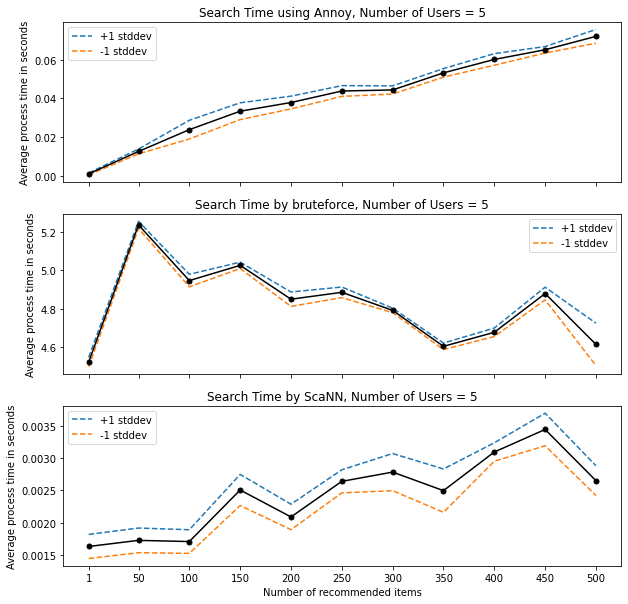

In [78]:
fig,ax = plt.subplots(3,1,figsize=(10,10),sharex=True)
ax[0].plot(ks,np.array(list(annoy_means.values()))+np.array(list(annoy_stddev.values())),'--',label='+1 stddev')
ax[0].plot(ks,np.array(list(annoy_means.values()))-np.array(list(annoy_stddev.values())),'--',label='-1 stddev')
ax[0].plot(ks,list(annoy_means.values()),'.-',markersize=10,c = 'k')
ax[0].legend()

ax[1].plot(ks,np.array(list(bruteforce_means.values()))+np.array(list(bruteforce_stddev.values())),'--',label='+1 stddev')
ax[1].plot(ks,np.array(list(bruteforce_means.values()))-np.array(list(bruteforce_stddev.values())),'--',label='-1 stddev')
ax[1].plot(ks,list(bruteforce_means.values()),'.-',markersize=10,c = 'k')
ax[1].legend()

ax[2].plot(ks,np.array(list(scann_means.values()))+np.array(list(scann_stddev.values())),'--',label='+1 stddev')
ax[2].plot(ks,np.array(list(scann_means.values()))-np.array(list(scann_stddev.values())),'--',label='-1 stddev')
ax[2].plot(ks,list(scann_means.values()),'.-',markersize=10,c = 'k')
ax[2].legend()

ax[0].set_xticks(ks)
ax[0].set_title(f'Search Time using Annoy, Number of Users = {num_users}')
ax[1].set_title(f'Search Time by bruteforce, Number of Users = {num_users}')
ax[2].set_title(f'Search Time by ScaNN, Number of Users = {num_users}')

ax[0].set_ylabel('Average process time in seconds')
ax[1].set_ylabel('Average process time in seconds')
ax[2].set_ylabel('Average process time in seconds')
ax[2].set_xlabel('Number of recommended items')

plt.show()

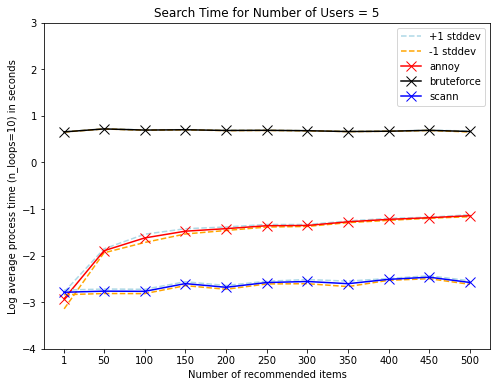

In [82]:
annoy_log_means = np.log10(list(annoy_means.values()))
annoy_log_stddev_pos = np.log10(np.array(list(annoy_means.values()))+np.array(list(annoy_stddev.values())))
annoy_log_stddev_neg = np.log10(np.array(list(annoy_means.values()))-np.array(list(annoy_stddev.values())))

bruteforce_log_means = np.log10(list(bruteforce_means.values()))
bruteforce_log_stddev_pos = np.log10(np.array(list(bruteforce_means.values()))+np.array(list(bruteforce_stddev.values())))
bruteforce_log_stddev_neg = np.log10(np.array(list(bruteforce_means.values()))-np.array(list(bruteforce_stddev.values())))

scann_log_means = np.log10(list(scann_means.values()))
scann_log_stddev_pos = np.log10(np.array(list(scann_means.values()))+np.array(list(scann_stddev.values())))
scann_log_stddev_neg = np.log10(np.array(list(scann_means.values()))-np.array(list(scann_stddev.values())))

plt.figure(figsize=(8,6))
plt.plot(ks,annoy_log_stddev_pos,'--',c='lightblue',label='+1 stddev')
plt.plot(ks,annoy_log_stddev_neg,'--',c='orange',label='-1 stddev')
plt.plot(ks,annoy_log_means,'r.-',markersize=10,label='annoy')
plt.plot(ks,bruteforce_log_stddev_pos,'--',c='lightblue')
plt.plot(ks,bruteforce_log_stddev_neg,'--',c='orange')
plt.plot(ks,bruteforce_log_means,'k.-',markersize=10,label='bruteforce')
plt.plot(ks,scann_log_stddev_pos,'--',c='lightblue')
plt.plot(ks,scann_log_stddev_neg,'--',c='orange')
plt.plot(ks,scann_log_means,'b.-',markersize=10,label='scann')

plt.xticks(ks)
# plt.yticks(range(-4,4,1),[f'log({j})'for j in 10.**np.arange(-4,4,1)])
plt.yticks(range(-4,4,1))
plt.xlabel('Number of recommended items')
plt.ylabel('Log average process time (n_loops=10) in seconds')
plt.title(f'Search Time for Number of Users = {num_users}')

plt.legend()
plt.show()